### Nama : Aryadika
### Jurusan : Sistem Komputer 2022
### Tugas GDGC Unsri

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

Melakukan import model dan tools yang akan digunakan terlebih dahulu

In [2]:
df = pd.read_csv(r'C:\Users\User\Documents\juputer\DataScience_salaries_2024.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


1. work_year: Tahun data gaji diambil.
2. experience_level: Tingkat pengalaman (e.g., MI untuk Mid-level, SE untuk Senior, dsb.).
3. employment_type: Jenis pekerjaan (e.g., FT untuk Full-time).
4. job_title: Jabatan pekerjaan (e.g., Data Scientist, ML Engineer, dsb.).
5. salary: Gaji dalam mata uang lokal.
6. salary_currency: Mata uang gaji.
7. salary_in_usd: Gaji yang dikonversi ke USD.
8. employee_residence: Lokasi tempat tinggal karyawan.
9. remote_ratio: Persentase remote work (e.g., 100 untuk full remote).
10. company_location: Lokasi perusahaan.
11. company_size: Ukuran perusahaan (e.g., S untuk Small, L untuk Large).

### Data Wrangling

In [3]:
df.shape

(14838, 11)

Menampilkan jumlah Baris dan kolom pada Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


Menampilkan berbagai informasi pada dataset

In [5]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

Menampilkan Informasi berupa tipe data pada setiap kolom

In [6]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Menampilkan apakah ada Missing value atau tidak

### Exploratory Data Analysis

In [7]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,14838.000000,1.483800e+04,14838.000000,14838.000000
mean,2023.138900,1.650227e+05,149874.718763,32.760480
std,0.700799,3.562354e+05,69009.181349,46.488278
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.021000e+05,102000.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.875000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


Menampilkan ringkasan informasi statistik untuk kolom numerik pada dataframe 

In [8]:
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':  
        df[column] = label_encoder.fit_transform(df[column])

Mengubah Kolom kategori menjadi Numerik

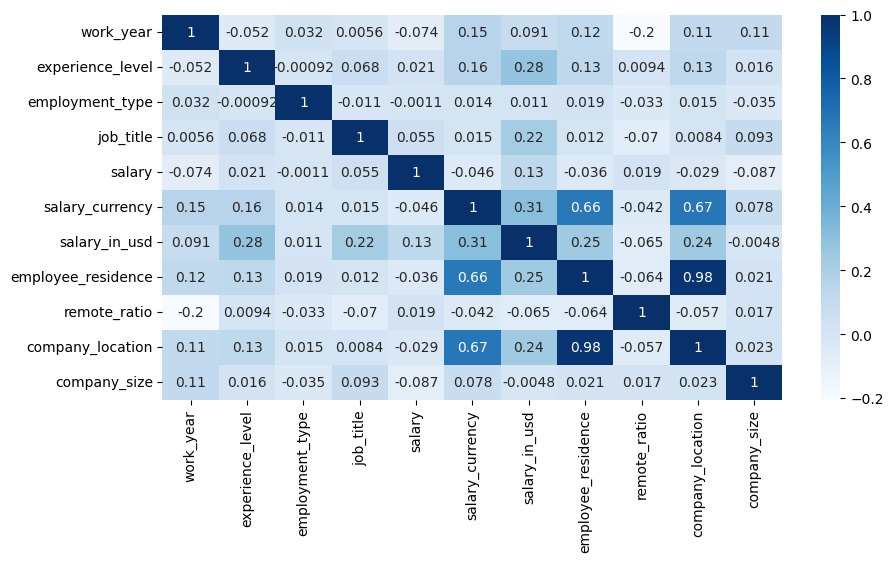

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.show()

In [10]:
X = df[['work_year', 'employment_type', 'job_title', 'remote_ratio', 'company_location', 'company_size']]
y = df['experience_level']

Membuat variabel X dan Y yg bertujuan memisahkan Fitur dan label dari dataset

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Membagi dataset menjadi traning data dan testing data

In [12]:
categorical_features = ['employment_type', 'job_title', 'company_location', 'company_size']
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
X_train_cat = one_hot_encoder.fit_transform(X_train[categorical_features]).toarray()
X_test_cat = one_hot_encoder.transform(X_test[categorical_features]).toarray()

Mengonversikan fitur kategorikal menajdi numerik menggunakn One-Hot Encoding

In [13]:
numeric_features = ['work_year', 'remote_ratio']
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numeric_features])
X_test_num = scaler.transform(X_test[numeric_features])

In [14]:
X_train_processed = np.hstack((X_train_num, X_train_cat))
X_test_processed = np.hstack((X_test_num, X_test_cat))

Menggabungkan Fitur Numerik yang sudah di standarkan dg Fitur kategorikal

In [22]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_processed, y_train)

RandomForestClassifier()

Membuat Model RandomForest

In [16]:
y_pred = rf_classifier.predict(X_test_processed)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7112533692722371
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.30      0.40       220
           1       0.79      0.28      0.42        92
           2       0.60      0.27      0.37       716
           3       0.73      0.94      0.82      1940

    accuracy                           0.71      2968
   macro avg       0.68      0.45      0.50      2968
weighted avg       0.69      0.71      0.67      2968



Mengevaluasi performa Model menggunakan Akurasi

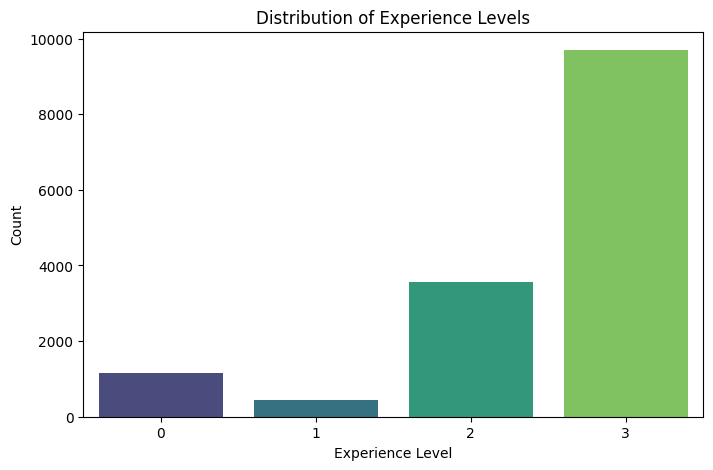

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='experience_level', palette='viridis')
plt.title('Distribution of Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.show()

Gambar tesebut menunjukan tingkat pengalaman Karyawan yg ada di dataset

A. Sumbe x (Experience Level)
1. 0 = Entry level
2. 1 = Junior
3. 2 = Mid-Level
4. 3 = Senior

B. Sumbu Y (Count), menunjukan jumlah karyawan dalam setiap tingkat pengalaman

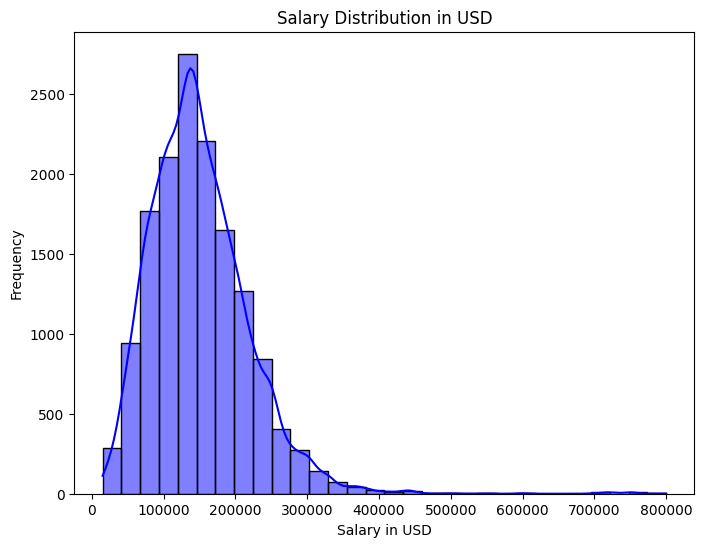

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='salary_in_usd', bins=30, kde=True, color='blue')
plt.title('Salary Distribution in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

Gambar di atas menampilkan Distribusi gaji dalam satuan USD 

A. Sumbu X (Salary In USD), Menunjukan Rentang gaji mulai dari nilai terendah hingga mendekati 800.000 USD

B. Sumbu Y (Frecuency), Menunjukan Jumlah Individu atau Frekuensi

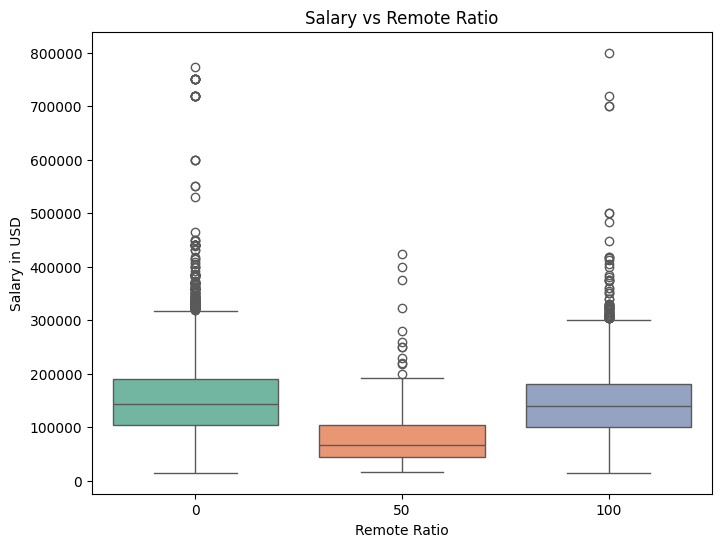

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='remote_ratio', y='salary_in_usd', palette='Set2')
plt.title('Salary vs Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary in USD')
plt.show()

Gambar menunjukan Hubungan antara Remote_Ratio (Kerja jarak jauh) dan Salary in USD (Gaji)

A. Sumbu X (Remote_ratio)
1. 0 = Tidak ada kerja jarak jauh
2. 50 = Kerja jarak jauh dan kerja di kantor (Hybrid)
3. 100 = Kerja Sepenuhnya jarak jauh

B. Sumbu Y (Salary in USD), menunjukan jumlah gaji 

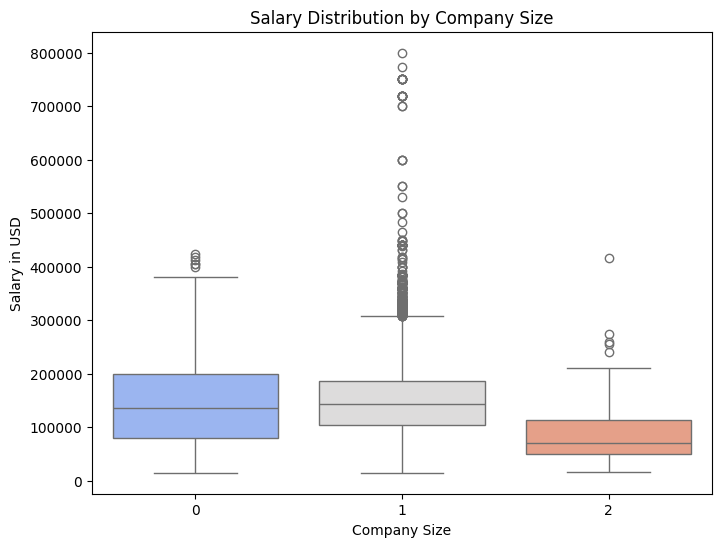

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='company_size', y='salary_in_usd', palette='coolwarm')
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.show()

Gambar menunjukan Hubungan antara Ukuran perusahaan (Company Size)  dan Salary in USD (Gaji)

A. Sumbu X (Company Size)
1. 0 = Perusahaan Kecil
2. 1 = Perusahaan Menengah
3. 2 = Perusahaan Besar

B. Sumbu Y (Salary in USD), menunjukan jumlah gaji 